In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
#Load dataset
data = pd.read_csv('CHC_2017.csv', sep = ";")
type(data)

pandas.core.frame.DataFrame

In [3]:
#Select needed features
features = data[['P17S3','P17S7','P26_1','P22','P8','P30_1','P9R','P16S9','P28R','P16S6','P29','P31','P33_1','P24','P32']]
features['P32'].value_counts() 

     3893
1    3823
2    1822
Name: P32, dtype: int64

In [4]:
features.count()

P17S3    9538
P17S7    9538
P26_1    9538
P22      9538
P8       9538
P30_1    9538
P9R      9538
P16S9    9538
P28R     9538
P16S6    9538
P29      9538
P31      9538
P33_1    9538
P24      9538
P32      9538
dtype: int64

In [5]:
#Replacing specific columns and then replace remainin blank spaces for nan (Cleaning data)

features['P17S3'] = features['P17S3'].replace(' ', 0)
features['P17S7'] = features['P17S7'].replace(' ', 0)
features['P26_1'] = features['P26_1'].replace(' ', 7)


for k in features.columns:
    features[k] = features[k].replace(' ', np.nan)

C:\Users\PCMASTER\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\PCMASTER\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\PCMASTER\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

In [6]:
#Dropping nan observations
features = features.dropna(axis=0)
features.head(10)

,P17S3,P17S7,P26_1,P22,P8,P30_1,P9R,P16S9,P28R,P16S6,P29,P31,P33_1,P24,P32
1,0,0,3,4,38,3,2,4,2,2,8,1,2,10,1
19,0,0,3,1,40,3,1,4,3,4,1,1,1,10,1
21,0,0,4,7,58,1,1,4,4,4,3,1,2,7,1
27,0,0,3,7,28,3,1,4,3,4,9,1,1,7,1
29,0,0,4,7,30,6,1,4,3,2,8,1,2,10,1
30,0,0,3,7,34,3,1,4,3,4,4,1,2,5,2
35,0,0,3,4,61,6,1,4,3,4,1,1,1,10,1
39,0,0,3,4,53,1,2,4,3,4,5,1,2,1,1
40,0,0,3,2,59,6,1,2,2,4,9,1,2,1,1
43,0,0,3,7,50,6,2,4,2,4,4,1,2,1,1


In [7]:
features.count()

P17S3    5152
P17S7    5152
P26_1    5152
P22      5152
P8       5152
P30_1    5152
P9R      5152
P16S9    5152
P28R     5152
P16S6    5152
P29      5152
P31      5152
P33_1    5152
P24      5152
P32      5152
dtype: int64

[Text(0, 0, 'Hombre'), Text(0, 0, 'Mujer')]

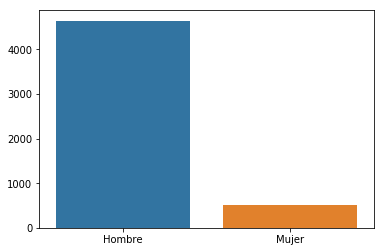

In [8]:
#Descriptive plots
Age_feat = features['P9R'].astype('int64').value_counts()
g = sns.barplot(y=Age_feat.values, x=Age_feat.index)
g.set_xticklabels(["Hombre","Mujer"])

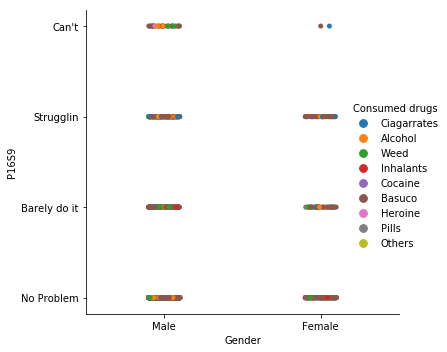

In [9]:
g = sns.catplot(x="P9R", y="P16S9", hue='P30_1', data=features, orient="v").set_axis_labels("Gender", "P16S9").set_xticklabels(["Male","Female"]).set_yticklabels(["No Problem","Barely do it","Strugglin","Can't"])

hue_title = 'Consumed drugs'
g._legend.set_title(hue_title)
g

new_labels = ['Ciagarrates', 'Alcohol', 'Weed', 'Inhalants', 'Cocaine', 'Basuco', 'Heroine', 'Pills', 'Others']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

g

[Text(0, 0, 'Cigar'),
 Text(0, 0, 'Alcohol'),
 Text(0, 0, 'Weed'),
 Text(0, 0, 'Inhal'),
 Text(0, 0, 'Coca'),
 Text(0, 0, 'Basuco'),
 Text(0, 0, 'Heroi'),
 Text(0, 0, 'Pills'),
 Text(0, 0, 'Others')]

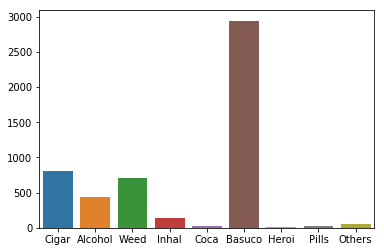

In [10]:
bars = sns.barplot(y=features['P30_1'].astype('int64').value_counts().values, x=features['P30_1'].astype('int64').value_counts().index)
bars.set_xticklabels(['Cigar', 'Alcohol', 'Weed', 'Inhal', 'Coca', 'Basuco', 'Heroi', 'Pills', 'Others'])

In [11]:
#Define label, features and convert to numpy array
X = features[['P17S3','P17S7','P26_1','P22','P8','P30_1','P9R','P16S9','P28R','P16S6','P29','P31','P33_1','P24']].astype(float)
y =  features['P32'].values

In [12]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float)) #Standardization with mean 0 and standard deviation 1
y=y.astype('int') #object parse as int

In [13]:
#Creating train/test sets
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=14)
print ('Train set shape:', X_train.shape,  y_train.shape)
print ('Test set shape:', X_test.shape,  y_test.shape)

Train set shape: (4121, 14) (4121,)
Test set shape: (1031, 14) (1031,)


In [14]:
## FIRST TECHNIQUE: KNN
#train, predict and implements metrics for a knn model
k = 100
mean_acc = np.zeros((k-1))
std_acc = np.zeros((k-1))
for i in range(1,k):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[i-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[i-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.70611057, 0.71580989, 0.74490786, 0.74587779, 0.75654704,
       0.76042677, 0.75363725, 0.7342386 , 0.75266731, 0.73326867,
       0.74878758, 0.74587779, 0.75266731, 0.75072745, 0.75557711,
       0.75363725, 0.76042677, 0.75751697, 0.76236663, 0.76333657,
       0.76527643, 0.76624636, 0.77497575, 0.77012609, 0.77497575,
       0.77012609, 0.77303589, 0.76624636, 0.77206596, 0.76624636,
       0.76915616, 0.76624636, 0.76721629, 0.76527643, 0.77012609,
       0.76527643, 0.76818623, 0.7613967 , 0.76624636, 0.76527643,
       0.76818623, 0.7643065 , 0.77109602, 0.76915616, 0.77109602,
       0.77400582, 0.77691562, 0.77206596, 0.77109602, 0.77497575,
       0.77497575, 0.77497575, 0.77206596, 0.77109602, 0.77206596,
       0.77109602, 0.77012609, 0.77012609, 0.77206596, 0.77206596,
       0.77303589, 0.77303589, 0.77400582, 0.77400582, 0.77497575,
       0.77497575, 0.77400582, 0.77303589, 0.77109602, 0.77206596,
       0.77206596, 0.77109602, 0.77109602, 0.77109602, 0.77303

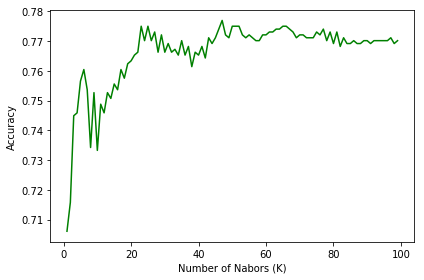

In [15]:
plt.plot(range(1,k),mean_acc,'g')
plt.ylabel('Accuracy')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [16]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.7769156159068865 with k= 47


In [17]:
print(yhat[0:5]) #some predictions
print(y_test[0:5])

[1 2 1 1 1]
[2 2 1 1 1]


In [18]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,2]))

[[616  81]
 [156 178]]


Confusion matrix, without normalization
[[616  81]
 [156 178]]


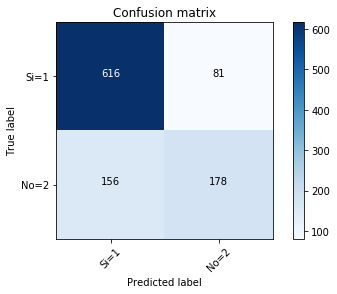

In [19]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,2])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Si=1','No=2'],normalize= False,  title='Confusion matrix')

In [20]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           1       0.80      0.88      0.84       697
           2       0.69      0.53      0.60       334

   micro avg       0.77      0.77      0.77      1031
   macro avg       0.74      0.71      0.72      1031
weighted avg       0.76      0.77      0.76      1031



In [21]:
## SECOND TECHNIQUE: DECISION TREE
from sklearn.tree import DecisionTreeClassifier
Tree = DecisionTreeClassifier(criterion="entropy")
Tree # it shows the default parameter

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [22]:
Tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [23]:
predTree = Tree.predict(X_test) 
print (predTree [0:5]) #some predictions
print (y_test [0:5])

[2 2 1 1 1]
[2 2 1 1 1]


In [24]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.7022308438409312


Confusion matrix, without normalization
[[531 166]
 [141 193]]


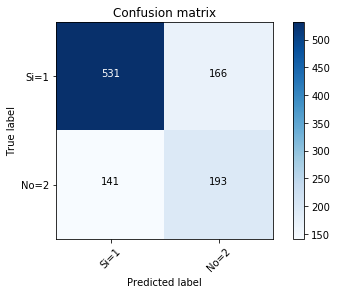

In [25]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predTree, labels=[1,2])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Si=1','No=2'],normalize= False,  title='Confusion matrix')

In [26]:
print (classification_report(y_test, predTree))

              precision    recall  f1-score   support

           1       0.79      0.76      0.78       697
           2       0.54      0.58      0.56       334

   micro avg       0.70      0.70      0.70      1031
   macro avg       0.66      0.67      0.67      1031
weighted avg       0.71      0.70      0.70      1031



In [35]:
## THIRD TECHNIQUE: LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import jaccard_similarity_score

C_param_range = [0.001,0.01,0.1,1,10,100]
y_hat_1 =[]
results = []
for k in C_param_range:
    y_hat_1 = LogisticRegression(C=k, solver='liblinear').fit(X_train,y_train).predict(X_test)
    results.append(jaccard_similarity_score(y_test, y_hat_1))

In [36]:
results

[0.7769156159068865,
 0.7769156159068865,
 0.7749757516973812,
 0.7749757516973812,
 0.7749757516973812,
 0.7749757516973812]

In [37]:
resultsnp = np.asarray(results)
y_hat = LogisticRegression(C=C_param_range[resultsnp.argmax()], solver='liblinear').fit(X_train,y_train).predict(X_test)
jaccard_similarity_score(y_test, y_hat)

0.7769156159068865

In [38]:
print (y_hat [0:5]) #some predictions
print (y_test [0:5])

[2 2 1 1 1]
[2 2 1 1 1]


Confusion matrix, without normalization
[[600  97]
 [133 201]]


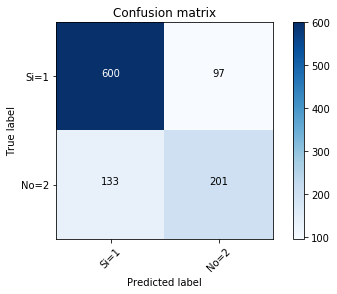

In [40]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_hat, labels=[1,2])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Si=1','No=2'],normalize= False,  title='Confusion matrix')

In [39]:
print (classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           1       0.82      0.86      0.84       697
           2       0.67      0.60      0.64       334

   micro avg       0.78      0.78      0.78      1031
   macro avg       0.75      0.73      0.74      1031
weighted avg       0.77      0.78      0.77      1031



In [41]:
from sklearn.metrics import log_loss
model = LogisticRegression(C=C_param_range[resultsnp.argmax()], solver='liblinear').fit(X_train,y_train)
yhat_prob = model.predict_proba(X_test)
y_hat_svm
log_loss(y_test, yhat_prob)

0.5848780500757157

In [51]:
## THIRD TECHNIQUE: SUPPORT VECTOR MACHINE
#Trying some kernels
from sklearn import svm
kernels_name = ['linear','poly','rbf','sigmoid']
y_hat_2 =[]
results_2 = []
for j in kernels_name:
    y_hat_2 = svm.SVC(kernel = j).fit(X_train,y_train).predict(X_test)
    print (classification_report(y_test, y_hat_2))
    


              precision    recall  f1-score   support

           1       0.85      0.82      0.83       697
           2       0.65      0.69      0.67       334

   micro avg       0.78      0.78      0.78      1031
   macro avg       0.75      0.76      0.75      1031
weighted avg       0.78      0.78      0.78      1031



C:\Users\PCMASTER\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

           1       0.83      0.83      0.83       697
           2       0.64      0.64      0.64       334

   micro avg       0.77      0.77      0.77      1031
   macro avg       0.73      0.73      0.73      1031
weighted avg       0.77      0.77      0.77      1031



C:\Users\PCMASTER\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

           1       0.84      0.84      0.84       697
           2       0.67      0.66      0.67       334

   micro avg       0.79      0.79      0.79      1031
   macro avg       0.76      0.75      0.75      1031
weighted avg       0.79      0.79      0.79      1031



C:\Users\PCMASTER\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

           1       0.74      0.75      0.75       697
           2       0.47      0.46      0.47       334

   micro avg       0.66      0.66      0.66      1031
   macro avg       0.61      0.61      0.61      1031
weighted avg       0.66      0.66      0.66      1031



In [53]:
clf_rbf = svm.SVC(kernel='rbf')
clf_rbf.fit(X_train, y_train) 
y_hat_rbf = clf_rbf.predict(X_test)
print (classification_report(y_test, y_hat_rbf))

C:\Users\PCMASTER\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

           1       0.84      0.84      0.84       697
           2       0.67      0.66      0.67       334

   micro avg       0.79      0.79      0.79      1031
   macro avg       0.76      0.75      0.75      1031
weighted avg       0.79      0.79      0.79      1031



Confusion matrix, without normalization
[[588 109]
 [112 222]]


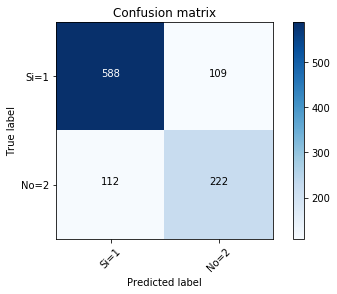

In [54]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_hat_rbf, labels=[1,2])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Si=1','No=2'],normalize= False,  title='Confusion matrix')